In [1]:
from keras.optimizers import Adam
import os
import cv2
import numpy as np
from random import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
directory = '/kaggle/input/utkface-new/UTKFace/'

# List all files in the directory
onlyfiles = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# Shuffle the list of files
np.random.shuffle(onlyfiles)

# Initialize empty arrays for features and labels
X = []
gender = []

# Read images and labels
for file in onlyfiles:
    img = cv2.resize(cv2.imread(file), (128, 128))
    label = int(os.path.basename(file).split('_')[1])
    
    X.append(img)
    gender.append(label)

# Convert to numpy arrays
X = np.array(X).astype('float32') / 255.0
gender = to_categorical(gender, num_classes=2)

In [3]:
# Split data into train, test, and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, gender, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [4]:
# Build the model
model = Sequential([
    Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Conv2D(32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')
])

In [5]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=35, validation_data=(x_valid, y_valid))

Epoch 1/35
297/297 [==============================] - 12s 28ms/step - loss: 0.6601 - accuracy: 0.6605 - val_loss: 0.4208 - val_accuracy: 0.8216
Epoch 2/35
297/297 [==============================] - 7s 24ms/step - loss: 0.3861 - accuracy: 0.8292 - val_loss: 0.3572 - val_accuracy: 0.8465
Epoch 3/35
297/297 [==============================] - 7s 24ms/step - loss: 0.3405 - accuracy: 0.8490 - val_loss: 0.3148 - val_accuracy: 0.8604
Epoch 4/35
297/297 [==============================] - 7s 24ms/step - loss: 0.3172 - accuracy: 0.8619 - val_loss: 0.3029 - val_accuracy: 0.8667
Epoch 5/35
297/297 [==============================] - 7s 24ms/step - loss: 0.2949 - accuracy: 0.8686 - val_loss: 0.3017 - val_accuracy: 0.8663
Epoch 6/35
297/297 [==============================] - 7s 24ms/step - loss: 0.2863 - accuracy: 0.8748 - val_loss: 0.2793 - val_accuracy: 0.8747
Epoch 7/35
297/297 [==============================] - 7s 24ms/step - loss: 0.2583 - accuracy: 0.8854 - val_loss: 0.2790 - val_accuracy: 0.873

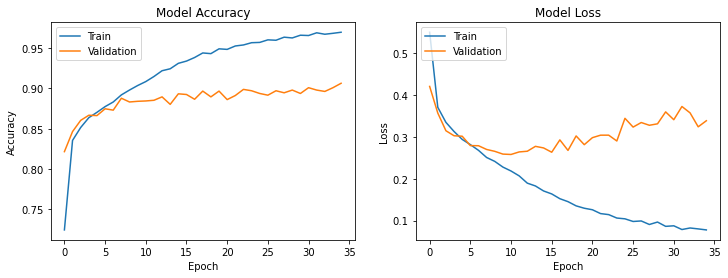

In [6]:
# Visualize the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plots
plt.savefig('training_visualization.png')

# Show the plots
plt.show()